In [17]:
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import scipy.stats as stats
import re
import seaborn as sns
import os

In [18]:
def get_number(s):
    match = re.search(r'\d+', s)
    return int(match.group()) if match else float('inf')

def get_exp(s):
    return re.sub(r'_\d+', '', s)  # remove trailing "_number" to get experiment name

In [19]:
input_dir = "Output"
excel_mode = True

In [20]:
animals = {}
for file in os.listdir(input_dir):
        name = os.path.join(input_dir, file)
        number = int(re.findall(r'\d+', file)[0][-2:])  # Finds all numbers, then takes last two digits
        animals[number] = pd.read_excel(name) if excel_mode else pd.read_csv(name)
print(f"Found {len(animals)} animal(s).")

Found 6 animal(s).


In [21]:
animals_df = pd.concat(animals, names=['animal_id']) 
animals_df['experiment'] = animals_df['experiment'].str.replace(r'^.*?_', '', regex=True) # Remove recording name from experiment name

# Add helper columns
animals_df['has_number'] = animals_df['experiment'].str.contains(r'\d+')
animals_df['experiment_type'] = animals_df['experiment'].apply(get_exp)
animals_df['experiment_number'] = animals_df['experiment'].apply(get_number)

# Sort by animal_id, then by if it has a number, then experiment type, then experiment number
animals_df = animals_df.sort_values(['animal_id', 'has_number', 'experiment_type', 'experiment_number'])

# Drop helper columns
animals_df = animals_df.drop(columns=['has_number', 'experiment_type', 'experiment_number'])

animals_df = animals_df.reset_index(level='animal_id').reset_index(drop=True)  # Flatten the index

In [22]:
print(animals_df)

     animal_id      experiment  reactionTime  peakTime  difference  strength
0            1     ASR_control          14.8      30.0        15.2     61.80
1            1       gap_depth          15.0      30.0        15.0     54.25
2            1   tone_in_noise          15.6      34.0        18.4     45.00
3            1  gap_duration_4          14.4      30.0        15.6     63.40
4            1  gap_duration_8          16.0      28.8        12.8     40.40
..         ...             ...           ...       ...         ...       ...
103         15   offset_PPI_14          18.0      30.8        12.8    138.80
104         15   offset_PPI_16          15.5      30.0        14.5    127.25
105         15   offset_PPI_18          20.0      30.5        10.5     99.00
106         15   offset_PPI_20          23.6      30.8         7.2     78.40
107         15   offset_PPI_50          18.0      30.0        12.0    113.80

[108 rows x 6 columns]


In [23]:
def plot_animal(animal_id):
    animal_data = animals_df[animals_df['animal_id'] == animal_id]

    plt.figure(figsize=(10, 5))
    plt.bar(animal_data['experiment'], animal_data['reactionTime'])
    
    plt.title(f'Reaction Time by Experiment (Animal {animal_id})')
    plt.xlabel('Experiment')
    plt.ylabel('Reaction Time (ms)')

    plt.xticks(rotation=45)  
    plt.tight_layout()
    plt.grid(True)
    plt.show()

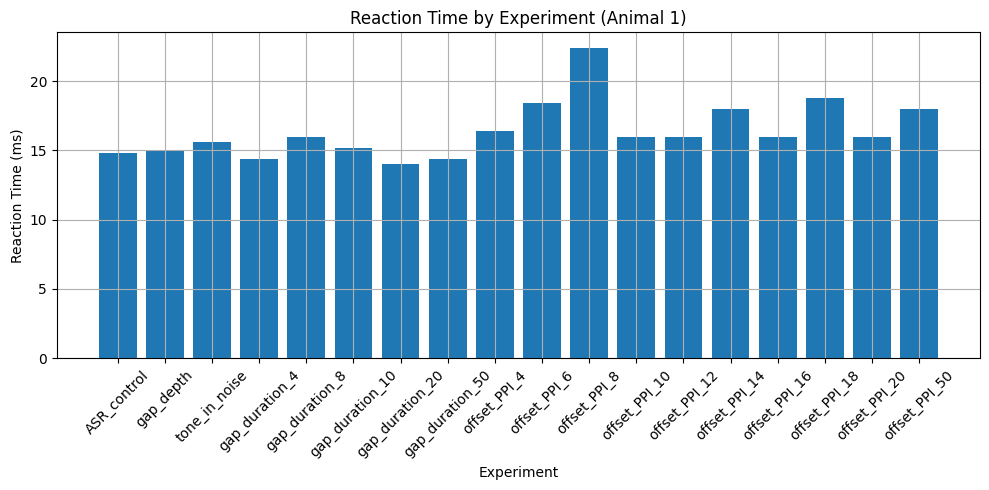

In [24]:
plot_animal(1)